Shape of the cleaned data: (11239, 13)

Data cleaning complete.

--- Analysis 1: Sales by Gender ---


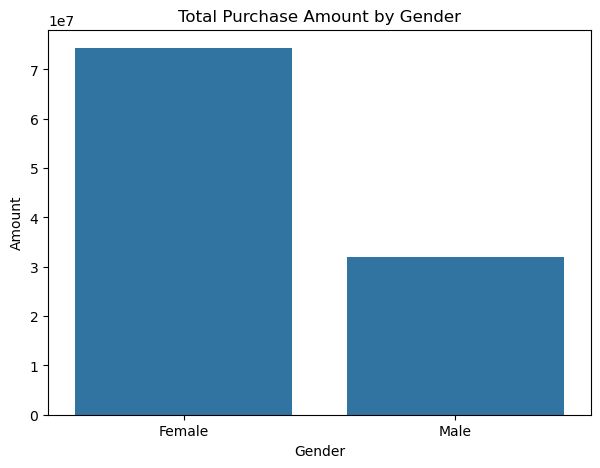


--- Analysis 2: Sales by Age Group ---


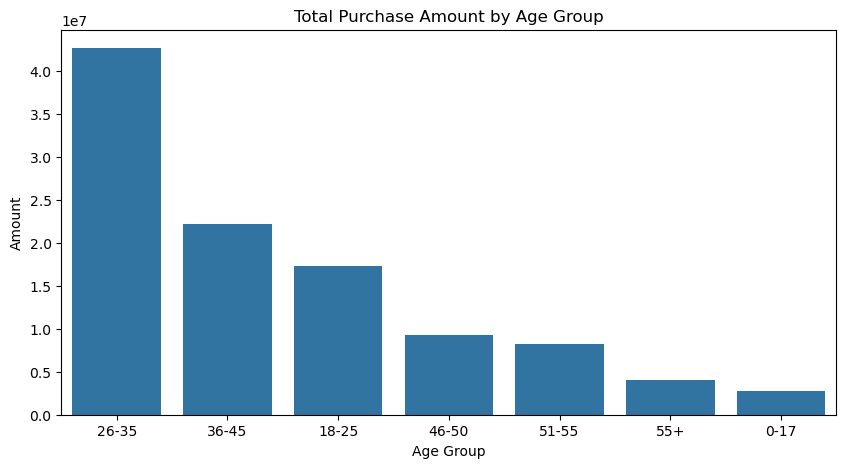


--- Analysis 3: Top 10 States by Sales ---


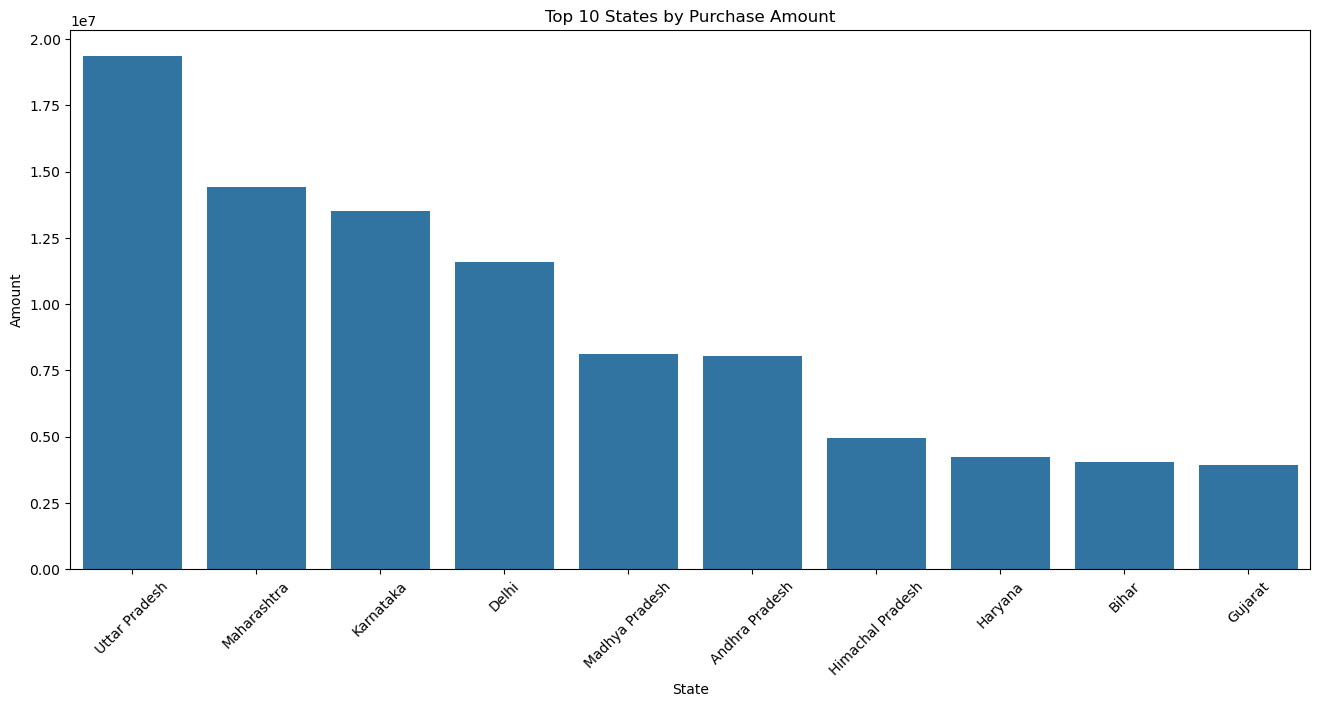


--- Analysis 4: Top 10 Product Categories by Sales ---


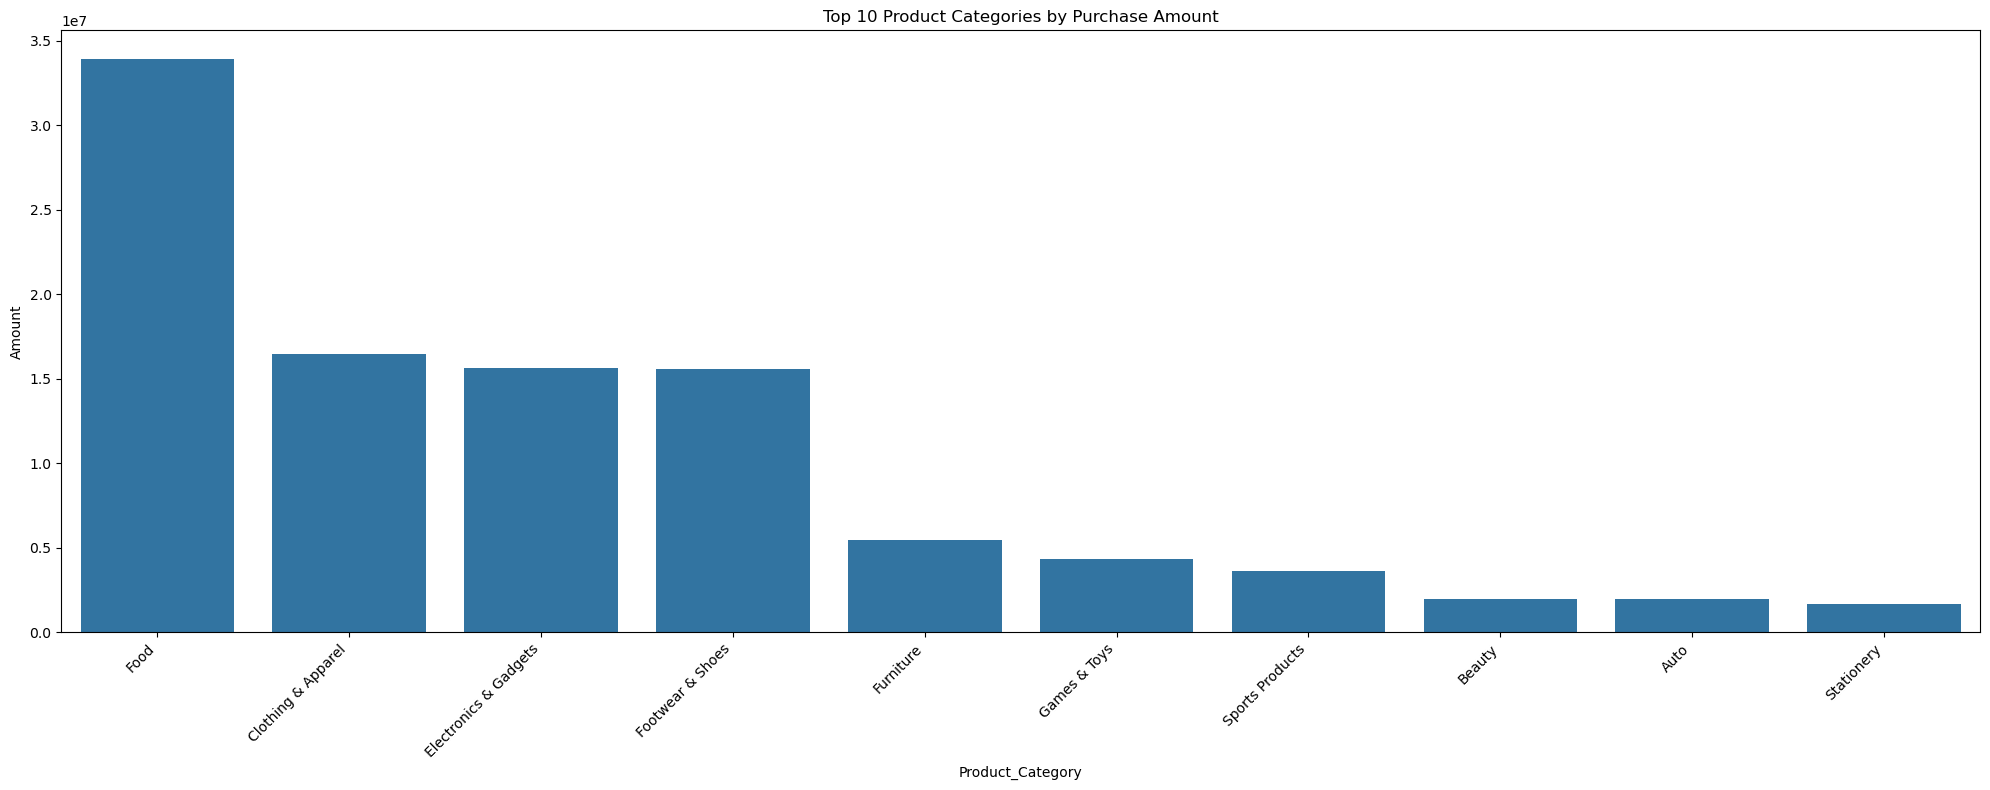


--- Analysis 5: Product Category Count ---


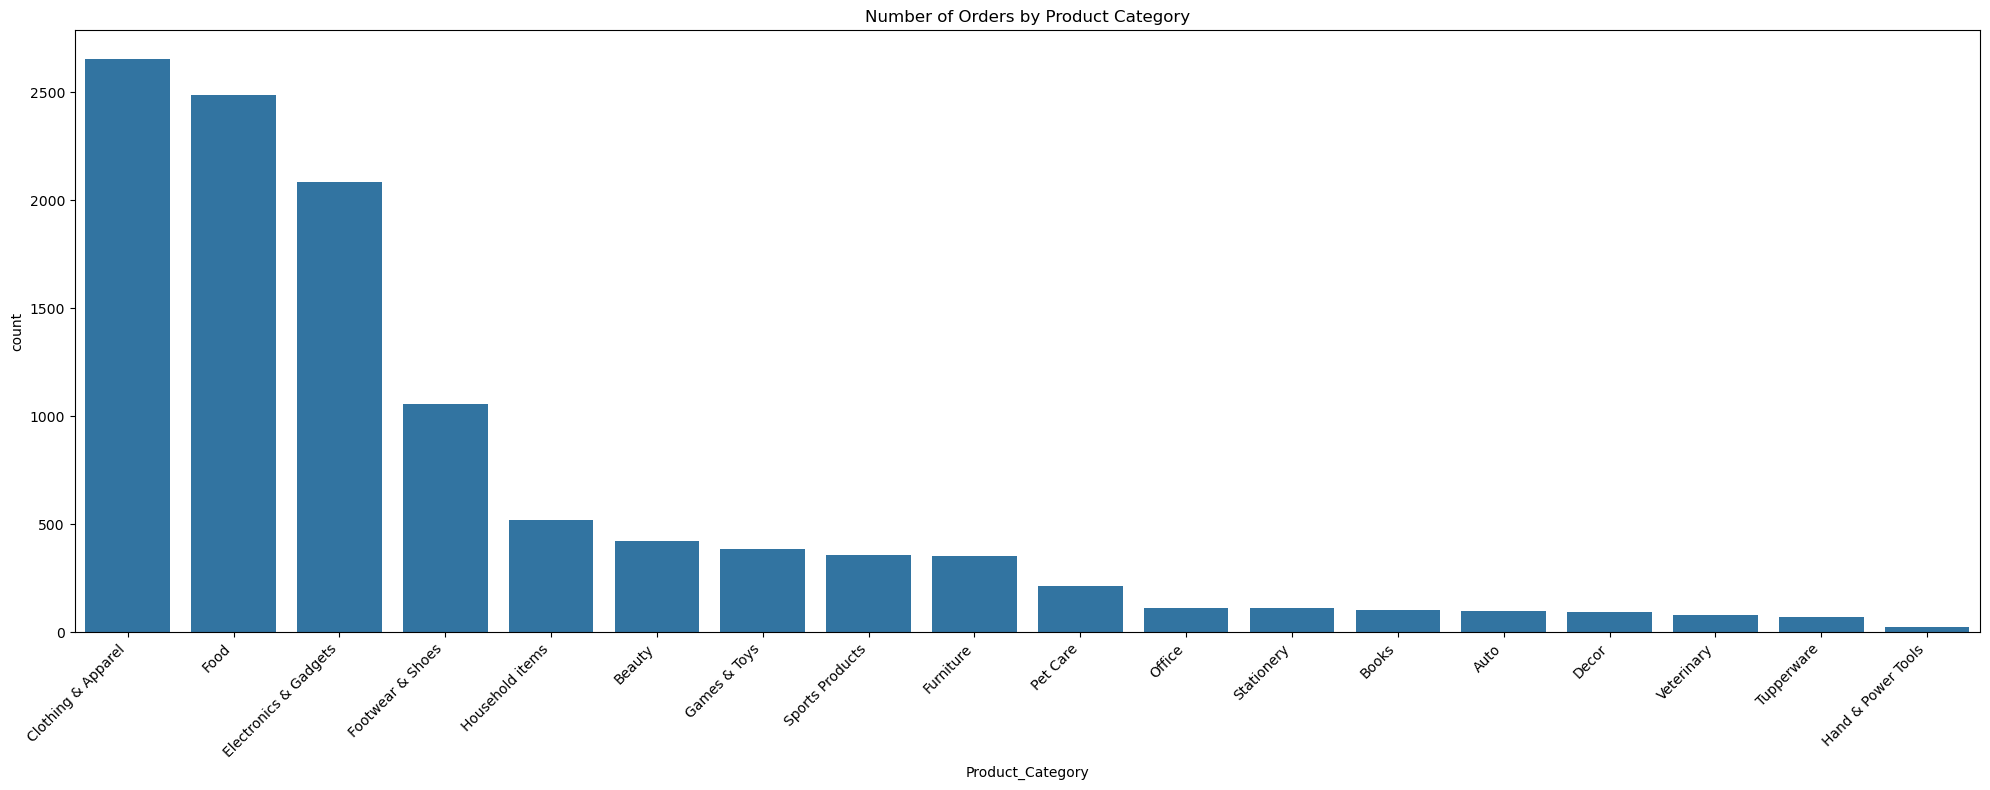


--- Analysis 6: Marital Status Impact on Sales ---


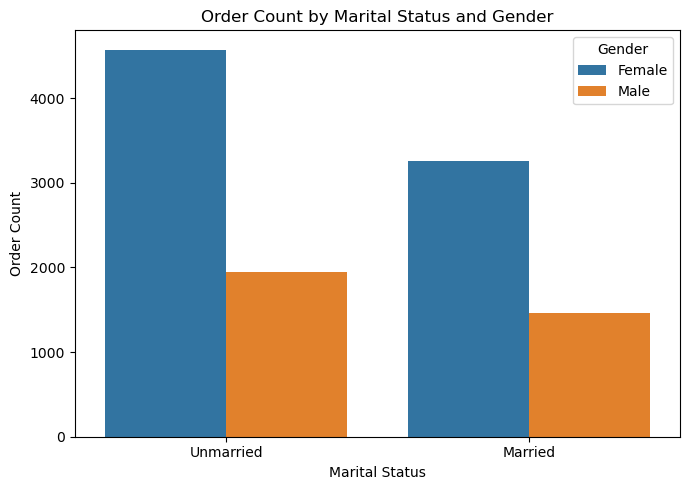

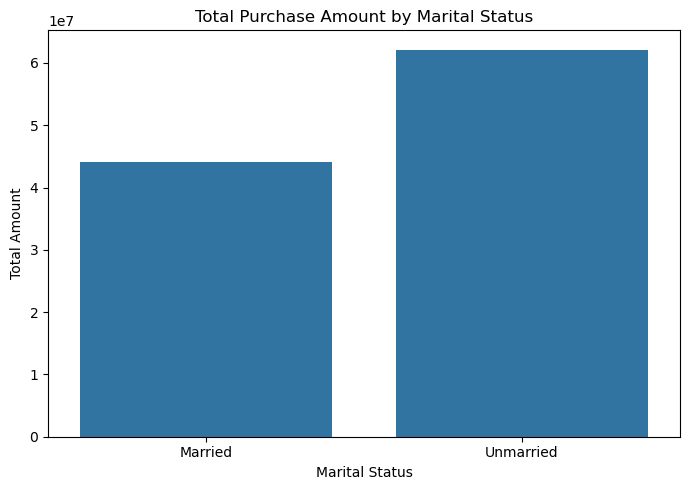


--- Analysis 7: Occupation Impact ---


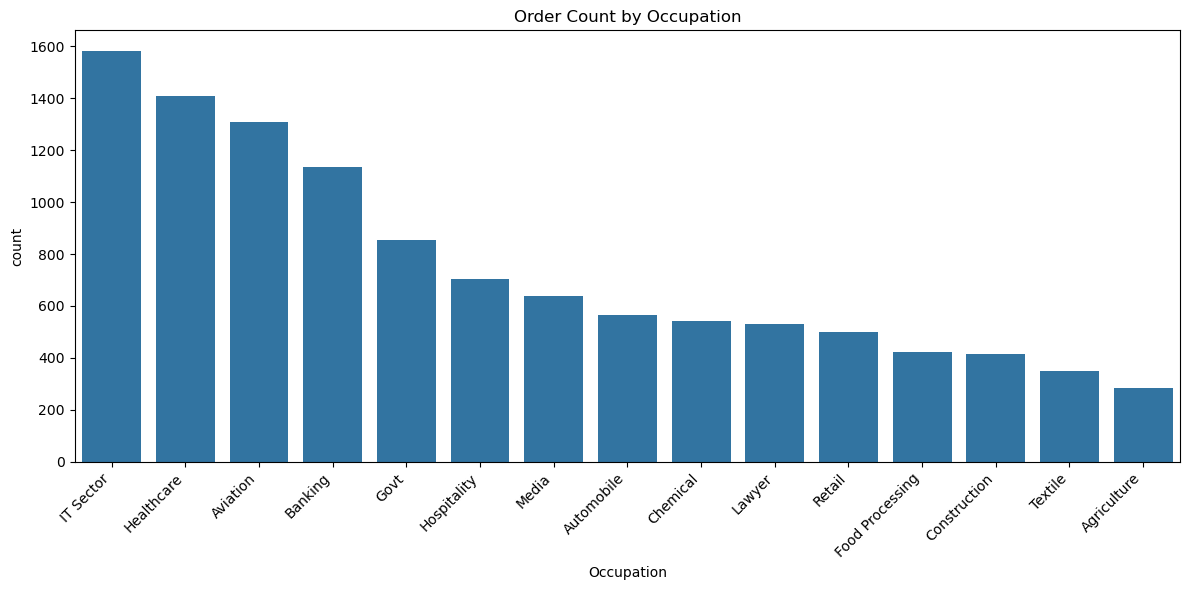

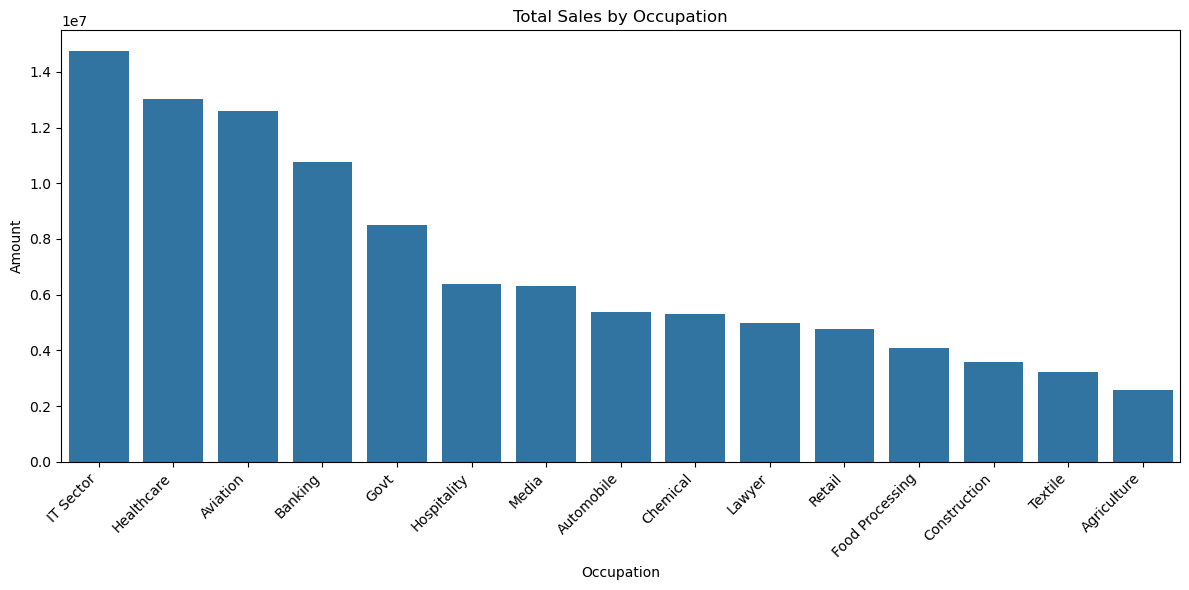


--- Final Metric: Total Revenue ---
Total Revenue Generated: ₹106,249,129


In [3]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# --- 2. Load and Clean Data ---
# Load the dataset
df = pd.read_csv('E:\\Anaconda\\Portfolio\\New Year Sales Data.csv', encoding='latin1')

# Drop unnecessary and empty columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Drop rows with null values
df.dropna(inplace=True)

# Convert 'Amount' column to integer type
df['Amount'] = df['Amount'].astype('int')

# --- 3. Replace 0/1 and codes with meaningful labels ---
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# --- 4. Verify cleaning ---
print("Shape of the cleaned data:", df.shape)
print("\nData cleaning complete.\n")

# --- 5. Exploratory Data Analysis (EDA) ---

# A. Total Purchase Amount by Gender
print("--- Analysis 1: Sales by Gender ---")
sales_by_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(x='Gender', y='Amount', data=sales_by_gender)
plt.title('Total Purchase Amount by Gender')
plt.show()

# B. Total Purchase Amount by Age Group
print("\n--- Analysis 2: Sales by Age Group ---")
sales_by_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group', y='Amount', data=sales_by_age)
plt.title('Total Purchase Amount by Age Group')
plt.show()

# C. Top 10 States by Sales
print("\n--- Analysis 3: Top 10 States by Sales ---")
sales_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(16, 7))
sns.barplot(data=sales_by_state, x='State', y='Amount')
plt.title('Top 10 States by Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# D. Top 10 Product Categories by Sales
print("\n--- Analysis 4: Top 10 Product Categories by Sales ---")
sales_by_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(data=sales_by_category, x='Product_Category', y='Amount')
plt.title('Top 10 Product Categories by Purchase Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# E. Product Category Count
print("\n--- Analysis 5: Product Category Count ---")
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Number of Orders by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# F. Marital Status Analysis
print("\n--- Analysis 6: Marital Status Impact on Sales ---")
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Order Count by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

sales_by_marital = df.groupby(['Marital_Status'], as_index=False)['Amount'].sum()
plt.figure(figsize=(7, 5))
sns.barplot(data=sales_by_marital, x='Marital_Status', y='Amount')
plt.title('Total Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

# G. Occupation Analysis
print("\n--- Analysis 7: Occupation Impact ---")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
plt.title('Order Count by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_occupation, x='Occupation', y='Amount')
plt.title('Total Sales by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# H. Final Metric: Total Revenue
total_revenue = df['Amount'].sum()
print(f"\n--- Final Metric: Total Revenue ---")
print(f"Total Revenue Generated: ₹{total_revenue:,}")
